In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
from sentence_transformers import SentenceTransformer

In [ ]:



model = SentenceTransformer("BAAI/bge-small-en-v1.5")

# Spam Classification

In [5]:
df = pd.read_csv('./Cases/Spam Classification/SPAM Data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
out_embs = []
for i in tqdm(range(len(df))):
    out_embs.append(model.encode(df['Message'][i]))

100%|██████████| 5572/5572 [02:40<00:00, 34.65it/s]


In [7]:
rf = RandomForestClassifier()
X = np.array(out_embs)
y = np.array(df['Category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.968609865470852

In [8]:
# Inferencing
def predict_spam(text):
    emb = model.encode(text)
    return rf.predict([emb])[0]

print(predict_spam("Congratulations! You have won a free ticket to the Bahamas. Text 'WIN' to 12345 to claim your prize!"))

spam


# Ecommerce Text Classification

In [10]:
# https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification

df_ss = pd.read_csv("./ecommerceDataset.csv", header=None)
df_ss.head()

,0,1
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [11]:
out_embs = []
for i in tqdm(range(len(df_ss))):
    out_embs.append(model.encode(df_ss[0][i]))

100%|██████████| 50425/50425 [21:32<00:00, 39.01it/s]


In [12]:
df_embed_ecomm = pd.DataFrame(out_embs, index=df_ss.index)
df_embed_ecomm.to_csv("./ecomm_embed.csv",
                      index=True)

In [15]:
df_books_embed = df_embed_ecomm[df_ss[0]=="Books"]
df_elect_embed = df_embed_ecomm[df_ss[0]=="Electronics"]
df_books_embed.shape, df_elect_embed.shape

((11820, 384), (10621, 384))

In [16]:
from sklearn.metrics.pairwise import cosine_similarity
sims_books = cosine_similarity(df_books_embed)
sims_books.shape

(11820, 11820)

In [17]:
df_sims_books = pd.DataFrame(sims_books)
df_sims_books[1000].sort_values(ascending=False)[1:6]

7775    1.0
7755    1.0
7756    1.0
7757    1.0
7758    1.0
Name: 1000, dtype: float32

In [18]:
df_ss.iloc[1000].values

array(['Household',
       'Seapora 56819 Glass Canopy, 36" x 12" All products are imported from the USA. All electronic products must be used with a step down/up converter for Indian voltage compatibility.'],
      dtype=object)

In [19]:
df_ss.iloc[[989,2579,2552 ]].values

array([['Household',
        'WICKER HUB Wicker Outdoor Patio Sofa Set (Black, Red) Ms frame 18 gauge crca pipe,hdpe cane,all weather,indoor or outdoor were we want we can used.'],
       ['Household',
        'Workspace Interio Modern Chair for Cafe Lounge Office Reception Garden with Wooden Legs (Set of 2) - Beige Size:Set of 2                                                                                \xa0|\xa0                           Color:Beige   Color-OffwhiteWHY THE AZAZO CHAIR IS THE BETTER CHOICE IN FURNITURE?.  - This beautiful chair is sure to be the envy of all your friends and family. - The chair base is best in class and work in harmony.  - LONGER LIFE MATERIAL – The Material used in this chair is long lasting and hard.  - STYLISH AND ERGONOMIC DESIGN – The design of the chair is very stylish and attractive.  - SECURE COMFORT FIT – If you set on this chair you will feel more comfortable.  - PREMIUM PACKAGING AND PREMIUM QUALITY - The chair is in premium quality and i

# Netflix popular movies dataset

Netflix popular movies dataset
https://www.kaggle.com/datasets/narayan63/netflix-popular-movies-dataset

In [21]:
df_sims_books

,0,1,2,3,4,5,6,7,8,9,...,11810,11811,11812,11813,11814,11815,11816,11817,11818,11819
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11815,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
11816,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
11817,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
11818,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [3]:
df_movie = pd.read_csv("./n_movies.csv")
df_movie.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


In [23]:
out_embs = []
for i in tqdm(range(len(df_movie))):
    out_embs.append(model.encode(df_movie['description'][i]))

100%|██████████| 9957/9957 [05:04<00:00, 32.70it/s]


In [25]:
sims_movies = cosine_similarity(out_embs)
sims_movies.shape

(9957, 9957)

In [ ]:
df_embed_movie = pd.DataFrame(sims_movies, index=list(df_movie['title']), columns=list(df_movie['title']))
df_embed_movie.to_csv("./movie_embed.csv")

In [4]:
df_embed_movie = pd.read_csv("./movie_embed.csv", index_col=0)
df_embed_movie

,Cobra Kai,The Crown,Better Call Saul,Devil in Ohio,Cyberpunk: Edgerunners,The Sandman,Rick and Morty,Breaking Bad,The Imperfects,Blonde,...,Black Mirror.1,Stranger Things.9,The Blacklist.1,American Horror Story.1,Breaking Bad.1,The Imperfects.1,The Walking Dead.1,The Crown.1,Supernatural.1,Devil in Ohio.1
Cobra Kai,1.000000,0.476549,0.412925,0.260138,0.403860,0.437033,0.447603,0.367920,0.427957,0.361530,...,0.395536,0.366705,0.370170,0.315149,0.367920,0.427957,0.345574,0.476549,0.491659,0.260138
The Crown,0.476549,1.000000,0.448446,0.369892,0.376290,0.415047,0.419308,0.328568,0.367966,0.553723,...,0.448880,0.358069,0.453850,0.388434,0.328568,0.367966,0.289702,1.000000,0.381083,0.369892
Better Call Saul,0.412925,0.448446,1.000000,0.406432,0.450821,0.420502,0.501214,0.411600,0.451253,0.449341,...,0.479491,0.431189,0.512094,0.486132,0.411600,0.451253,0.448544,0.448446,0.479445,0.406432
Devil in Ohio,0.260138,0.369892,0.406432,1.000000,0.480438,0.543324,0.469884,0.427676,0.526741,0.500324,...,0.503693,0.510813,0.502193,0.515039,0.427676,0.526741,0.421578,0.369892,0.438784,1.000000
Cyberpunk: Edgerunners,0.403860,0.376290,0.450821,0.480438,1.000000,0.480117,0.610716,0.479592,0.496966,0.461166,...,0.633461,0.514668,0.472413,0.494139,0.479592,0.496966,0.488460,0.376290,0.488543,0.480438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Imperfects,0.427957,0.367966,0.451253,0.526741,0.496966,0.525808,0.553276,0.513051,1.000000,0.421630,...,0.564654,0.527272,0.452812,0.426840,0.513051,1.000000,0.469471,0.367966,0.514908,0.526741
The Walking Dead,0.345574,0.289702,0.448544,0.421578,0.488460,0.443215,0.460041,0.450572,0.469471,0.372353,...,0.426768,0.460214,0.454757,0.452918,0.450572,0.469471,1.000000,0.289702,0.418244,0.421578
The Crown,0.476549,1.000000,0.448446,0.369892,0.376290,0.415047,0.419308,0.328568,0.367966,0.553723,...,0.448880,0.358069,0.453850,0.388434,0.328568,0.367966,0.289702,1.000000,0.381083,0.369892
Supernatural,0.491659,0.381083,0.479445,0.438784,0.488543,0.465054,0.516167,0.406114,0.514908,0.391458,...,0.507376,0.549888,0.392903,0.462471,0.406114,0.514908,0.418244,0.381083,1.000000,0.438784


In [6]:
import gradio

def recommend_movies(movie):
    titles = list(df_embed_movie[movie].sort_values(ascending=False)[1:6].index)
    descs = []
    for title in titles:
        descs.append(df_movie[df_movie['title']==title]['description'].values[0])
    return titles, descs

iface = gradio.Interface(fn=recommend_movies, 
                         inputs=[gradio.Textbox(lines=2, label="Movie")], 
                         outputs=[gradio.Textbox(label="Recommended Movies"),
                                    gradio.Textbox(label="Descriptions")],
                         title="Movie Recommender")
iface.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [5]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [6]:
km = KMeans(n_clusters=5)
km.fit(df_embed_movie)
silhouette_score(df_embed_movie, km.labels_)


0.13473585952163644

c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


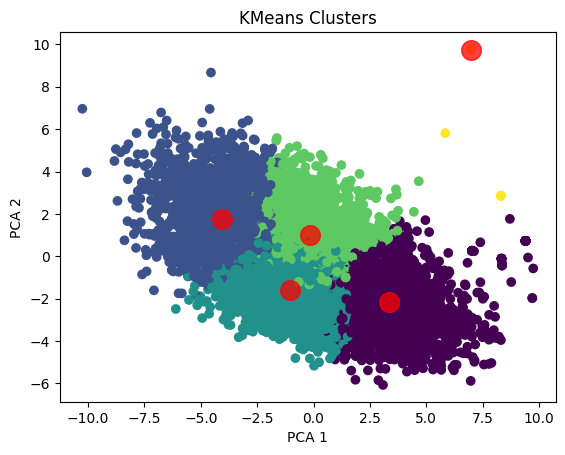

In [8]:
# plot the clusters
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df_embed_movie)
X = pca.transform(df_embed_movie)

plt.scatter(X[:, 0], X[:, 1], c=km.labels_, cmap='viridis')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("KMeans Clusters")

# draw cluster centers
centers = pca.transform(km.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.show()

In [9]:
from transformers import pipeline

qa = pipeline("question-answering", 
              model="distilbert/distilbert-base-cased-distilled-squad")
              
              
              
ctx = """Nikola Tesla (10 July 1856 – 7 January 1943) was a Serbian-American engineer, futurist, and inventor. He is known for his contributions to the design of the modern alternating current (AC) electricity supply system.
Born and raised in the Austrian Empire, Tesla first studied engineering and physics in the 1870s without receiving a degree. He then gained practical experience in the early 1880s working in telephony and at Continental Edison in the new electric power industry. In 1884 he immigrated to the United States, where he became a naturalized citizen. He worked for a short time at the Edison Machine Works in New York City before he struck out on his own. With the help of partners to finance and market his ideas, Tesla set up laboratories and companies in New York to develop a range of electrical and mechanical devices. His AC induction motor and related polyphase AC patents, licensed by Westinghouse Electric in 1888, earned him a considerable amount of money and became the cornerstone of the polyphase system which that company eventually marketed.

Attempting to develop inventions he could patent and market, Tesla conducted a range of experiments with mechanical oscillators/generators, electrical discharge tubes, and early X-ray imaging. He also built a wirelessly controlled boat, one of the first ever exhibited. Tesla became well known as an inventor and demonstrated his achievements to celebrities and wealthy patrons at his lab, and was noted for his showmanship at public lectures. Throughout the 1890s, Tesla pursued his ideas for wireless lighting and worldwide wireless electric power distribution in his high-voltage, high-frequency power experiments in New York and Colorado Springs. In 1893, he made pronouncements on the possibility of wireless communication with his devices. Tesla tried to put these ideas to practical use in his unfinished Wardenclyffe Tower project, an intercontinental wireless communication and power transmitter, but ran out of funding before he could complete it.
"""

qa({
    "question": "Where was Nikola Tesla born?",
    "context": ctx
})

config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\dbda.STUDENTSDC\.cache\huggingface\hub\models--distilbert--distilbert-base-cased-distilled-squad. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\transformers\pipelines\question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(


{'score': 0.8756684064865112,
 'start': 239,
 'end': 254,
 'answer': 'Austrian Empire'}